# Data Import & Scoping

In [859]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atillacolak/top-50-spotify-tracks-2020")

print("Path to dataset files:", path)

Path to dataset files: /Users/guywinfield/.cache/kagglehub/datasets/atillacolak/top-50-spotify-tracks-2020/versions/2


In [856]:
import pandas as pd

pd.set_option('display.max_columns', None)

raw_data = pd.read_csv("spotifytoptracks.csv")

In [857]:
data = raw_data.copy()

In [858]:
data.head(5)

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [803]:
data.shape

(50, 17)

In [804]:
data.dtypes.value_counts()


float64    9
object     5
int64      3
Name: count, dtype: int64

In [805]:
data.isnull().sum()

Unnamed: 0          0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

In [806]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50.0,24.500000,14.577380,0.00000,12.250000,24.50000,36.75000,49.000
energy,50.0,0.609300,0.154348,0.22500,0.494000,0.59700,0.72975,0.855
danceability,50.0,0.716720,0.124975,0.35100,0.672500,0.74600,0.79450,0.935
key,50.0,5.720000,3.709007,0.00000,2.000000,6.50000,8.75000,11.000
loudness,50.0,-6.225900,2.349744,-14.45400,-7.552500,-5.99150,-4.28550,-3.280
acousticness,50.0,0.256206,0.265250,0.00146,0.052800,0.18850,0.29875,0.934
speechiness,50.0,0.124158,0.116836,0.02900,0.048325,0.07005,0.15550,0.487
instrumentalness,50.0,0.015962,0.094312,0.00000,0.000000,0.00000,0.00002,0.657
liveness,50.0,0.196552,0.176610,0.05740,0.093950,0.11100,0.27125,0.792
valence,50.0,0.555710,0.216386,0.06050,0.434000,0.56000,0.72625,0.925


In [807]:
genre_summary = data.describe().T

In [808]:
genre_summary['std_dev_pct'] = genre_summary['std'] / genre_summary['mean']
genre_summary['std_dev_bool'] = genre_summary['std_dev_pct'] > genre_summary['mean']
genre_summary

,count,mean,std,min,25%,50%,75%,max,std_dev_pct,std_dev_bool
Unnamed: 0,50.0,24.500000,14.577380,0.00000,12.250000,24.50000,36.75000,49.000,0.594995,False
energy,50.0,0.609300,0.154348,0.22500,0.494000,0.59700,0.72975,0.855,0.253320,False
danceability,50.0,0.716720,0.124975,0.35100,0.672500,0.74600,0.79450,0.935,0.174371,False
key,50.0,5.720000,3.709007,0.00000,2.000000,6.50000,8.75000,11.000,0.648428,False
loudness,50.0,-6.225900,2.349744,-14.45400,-7.552500,-5.99150,-4.28550,-3.280,-0.377414,True
acousticness,50.0,0.256206,0.265250,0.00146,0.052800,0.18850,0.29875,0.934,1.035302,True
speechiness,50.0,0.124158,0.116836,0.02900,0.048325,0.07005,0.15550,0.487,0.941030,True
instrumentalness,50.0,0.015962,0.094312,0.00000,0.000000,0.00000,0.00002,0.657,5.908532,True
liveness,50.0,0.196552,0.176610,0.05740,0.093950,0.11100,0.27125,0.792,0.898541,True
valence,50.0,0.555710,0.216386,0.06050,0.434000,0.56000,0.72625,0.925,0.389387,False


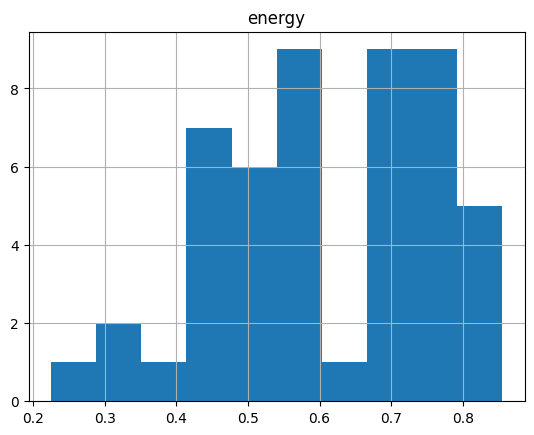

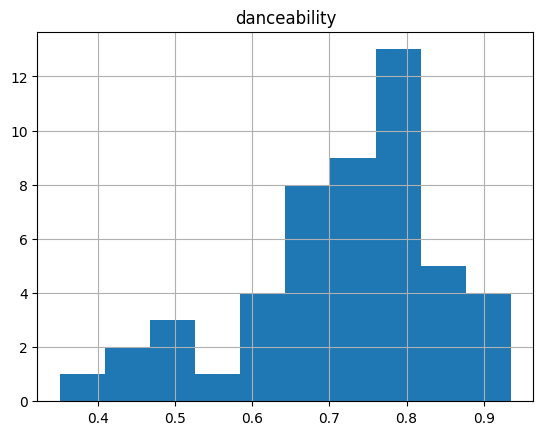

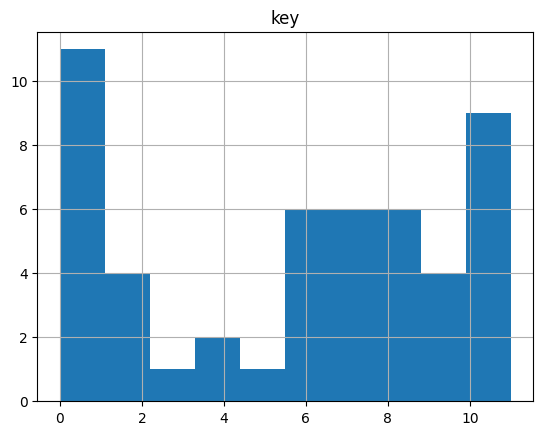

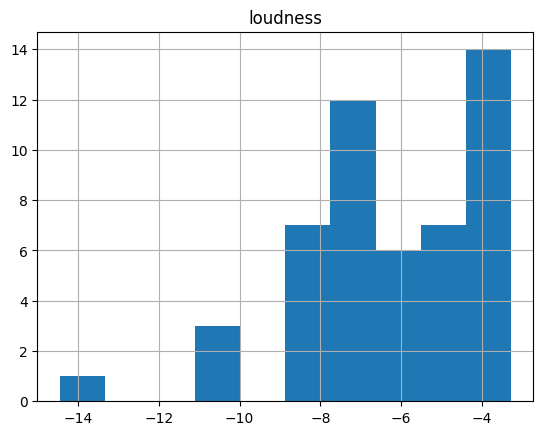

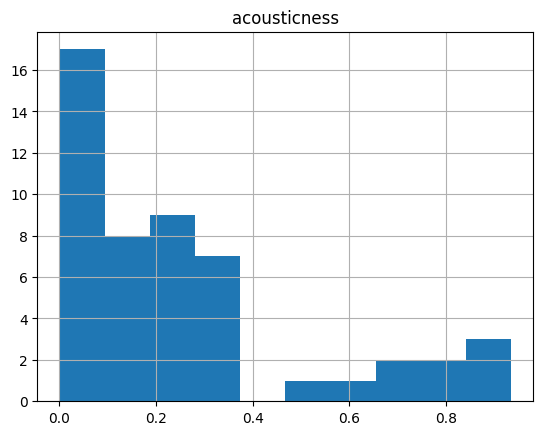

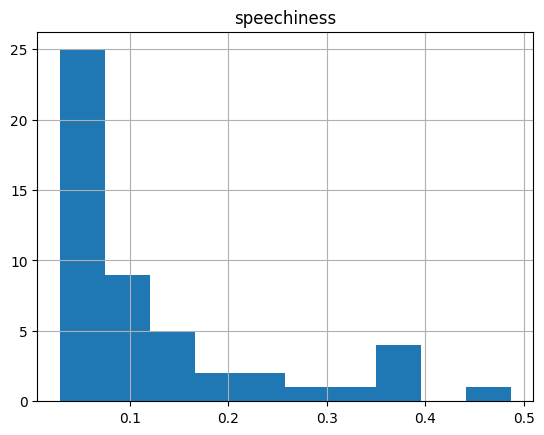

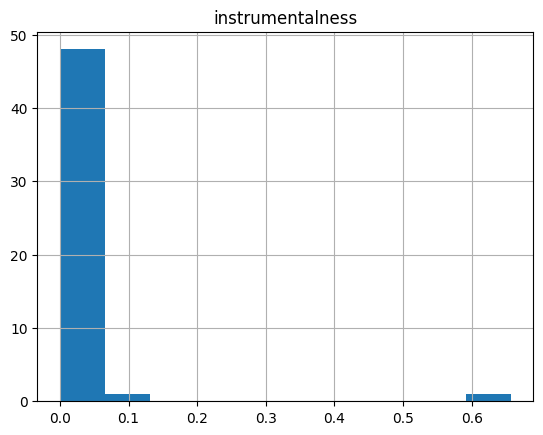

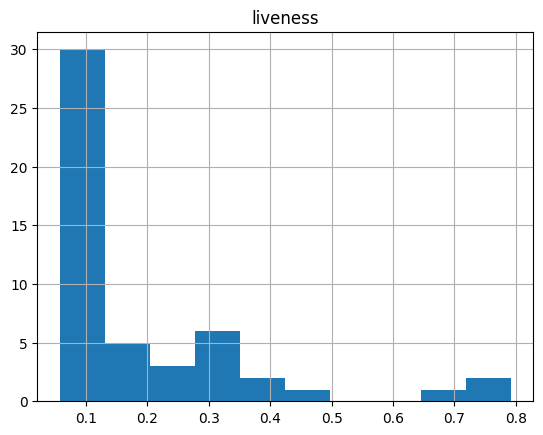

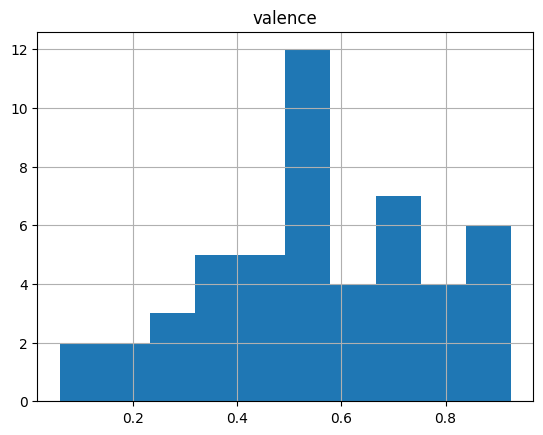

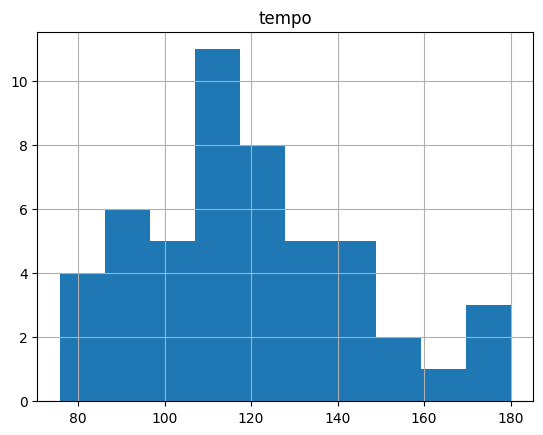

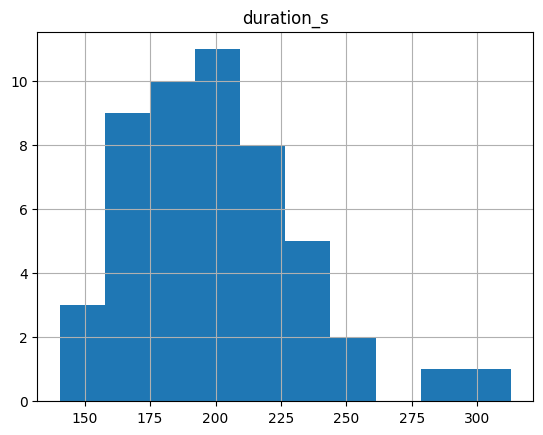

In [850]:

columns = ['energy','danceability','key','loudness','acousticness','speechiness','instrumentalness','liveness','valence','tempo','duration_s']

import matplotlib.pyplot as plt

for col in columns:
    data[col].hist()
    plt.title(col)
    plt.show()


# Data Preparation

- Rename unnamed field to rank
- add +1 to each rank
- Loudness, Instrumentalness outliers
- Convert duration_ms to minutes:seconds
- Add a broader genre field

In [810]:
data.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [811]:
data.rename(columns={"Unnamed: 0": "rank"}, inplace=True)
data["rank"] = data["rank"] + 1

print(f" Min Rank:",data["rank"].min(),"| Max Rank:",data["rank"].max(),"| Total Ranks:",data["rank"].count())

 Min Rank: 1 | Max Rank: 50 | Total Ranks: 50


In [812]:
data['genre'] = data['genre'].str.strip()
data['genre'].value_counts(ascending=True)

genre
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
R&B/Soul                               2
Electro-pop                            2
Alternative/Indie                      4
Dance/Electronic                       5
Hip-Hop/Rap                           13
Pop                                   14
Name: count, dtype: int64

In [813]:
dummies = data['genre'].str.get_dummies("/")
data = data.join(dummies.add_prefix("Genre_"))


In [814]:
#Do we want singles released without albums to be counted as albums?

data['single_release_only'] = data['album'] == data['track_name']


In [815]:
data['duration'] = pd.to_datetime(data['duration_ms'],unit='ms').dt.strftime('%M:%S')
data['duration_s'] = data['duration_ms'] * 0.001

del data['duration_ms']



In [816]:
data.head(2)

,rank,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,genre,Genre_Alternative,Genre_Chamber pop,Genre_Dance,Genre_Dance-pop,Genre_Disco,Genre_Disco-pop,Genre_Dreampop,Genre_Electro-pop,Genre_Electronic,Genre_Hip-Hop,Genre_Hip-Hop alternative,Genre_Indie,Genre_Nu-disco,Genre_Pop,Genre_Pop rap,Genre_R&B,Genre_Rap,Genre_Soft Rock,Genre_Soul,Genre_Trap,Genre_experimental,Genre_reggaeton,single_release_only,duration,duration_s
0,1,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,R&B/Soul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,False,03:20,200.040
1,2,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,Alternative/Indie,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,True,03:29,209.755


In [817]:
pop_replacement = ['Electro-pop','Chamber pop','Disco-pop','Pop rap','Pop/Soft Rock']
hip_hop_replacement = ['Hip-Hop/Trap','R&B/Hip-Hop alternative']
dance_replacement = ['Dance-pop/Disco','Nu-disco']

data['broad_genre'] = data['genre']

data['broad_genre'].replace(pop_replacement, 'Pop', inplace=True)
data['broad_genre'].replace(hip_hop_replacement, 'Hip-Hop/Rap', inplace=True)
data['broad_genre'].replace(dance_replacement, 'Dance/Electronic', inplace=True)



/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_2942/84717053.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['broad_genre'].replace(pop_replacement, 'Pop', inplace=True)


In [818]:
data['broad_genre'].value_counts()

broad_genre
Pop                                   20
Hip-Hop/Rap                           15
Dance/Electronic                       7
Alternative/Indie                      4
R&B/Soul                               2
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Name: count, dtype: int64

# Question Requirements

### Are there any artists that have more than 1 popular track? If yes, which and how many?





In [819]:
popular_artists = data.groupby(['artist'])['rank'].count().where(data.groupby(['artist'])['rank'].count() > 1).dropna()
popular_artists = pd.DataFrame(popular_artists).reset_index()
popular_artists = pd.merge(popular_artists, data, on="artist")
popular_artists = popular_artists[['artist','track_name','rank_y']]

print(f" There are {len(popular_artists.groupby(['artist']).count())} popular artists (With more than 1 track in top 50) out of a total of {len(data.groupby(['artist']).count())} artists")
popular_artists


 There are 7 popular artists (With more than 1 track in top 50) out of a total of 40 artists


,artist,track_name,rank_y
0,Billie Eilish,everything i wanted,25
1,Billie Eilish,bad guy,27
2,Billie Eilish,lovely (with Khalid),45
3,Dua Lipa,Don't Start Now,5
4,Dua Lipa,Break My Heart,32
5,Dua Lipa,Physical,49
6,Harry Styles,Watermelon Sugar,7
7,Harry Styles,Adore You,22
8,Justin Bieber,Intentions (feat. Quavo),15
9,Justin Bieber,Yummy,31


### Who was the most popular artist?


In [820]:
print("It depends on what we mean by popular: \n The highest ranked artist and most songs? Dua Lipa. \n On average the most popular? Lewis Capaldi \n ")
popular_artists.groupby(['artist'])['rank_y'].agg(['count','mean','min','max']).reset_index().sort_values(by=['mean'],ascending=True)

It depends on what we mean by popular: 
 The highest ranked artist and most songs? Dua Lipa. 
 On average the most popular? Lewis Capaldi 
 


,artist,count,mean,min,max
4,Lewis Capaldi,2,13.500000,10,17
2,Harry Styles,2,14.500000,7,22
3,Justin Bieber,2,23.000000,15,31
5,Post Malone,2,25.500000,13,38
1,Dua Lipa,3,28.666667,5,49
0,Billie Eilish,3,32.333333,25,45
6,Travis Scott,3,42.666667,37,50


## Are there any albums that have more than 1 popular track? If yes, which and how many?

In [821]:
popular_albums = data[data['single_release_only'] == False]
popular_albums = popular_albums.groupby(['artist','album'])['rank'].agg(['count', 'min', 'max','mean']).reset_index().sort_values(by=['count'], ascending=False)
popular_albums = popular_albums[popular_albums['count'] > 1]
popular_albums = pd.merge(popular_albums, data, on=["album",'artist'])

popular_albums.groupby(['artist','album'])['album'].count()


artist         album               
Dua Lipa       Future Nostalgia        3
Harry Styles   Fine Line               2
Justin Bieber  Changes                 2
Post Malone    Hollywood's Bleeding    2
Name: album, dtype: int64

In [822]:
popular_albums[['artist','album','track_name']]

,artist,album,track_name
0,Dua Lipa,Future Nostalgia,Don't Start Now
1,Dua Lipa,Future Nostalgia,Break My Heart
2,Dua Lipa,Future Nostalgia,Physical
3,Justin Bieber,Changes,Intentions (feat. Quavo)
4,Justin Bieber,Changes,Yummy
5,Post Malone,Hollywood's Bleeding,Circles
6,Post Malone,Hollywood's Bleeding,Sunflower - Spider-Man: Into the Spider-Verse
7,Harry Styles,Fine Line,Watermelon Sugar
8,Harry Styles,Fine Line,Adore You


## How many albums in total have their songs in the top 50?


In [823]:
print(f"There are {len(data['album'].unique())} unique albums in the top 50")

There are 45 unique albums in the top 50


## Which tracks have a danceability score above 0.7?


In [824]:
print(f"There are {len(data[data['danceability'] > 0.7])} tracks with danceability greater than 0.7")
data[['artist','track_name','danceability']][data['danceability'] > 0.7]


There are 32 tracks with danceability greater than 0.7


,artist,track_name,danceability
1,Tones And I,Dance Monkey,0.825
2,Roddy Ricch,The Box,0.896
3,SAINt JHN,Roses - Imanbek Remix,0.785
4,Dua Lipa,Don't Start Now,0.793
5,DaBaby,ROCKSTAR (feat. Roddy Ricch),0.746
7,Powfu,death bed (coffee for your head),0.726
8,Trevor Daniel,Falling,0.784
10,KAROL G,Tusa,0.803
13,Lil Mosey,Blueberry Faygo,0.774
14,Justin Bieber,Intentions (feat. Quavo),0.806


## Which tracks have a danceability score below 0.4?


In [825]:
print(f"There are {len(data[data['danceability'] < 0.4])} tracks with danceability lower than 0.4")
data[['artist','track_name','danceability']][data['danceability'] < 0.4]


There are 1 tracks with danceability lower than 0.4


,artist,track_name,danceability
44,Billie Eilish,lovely (with Khalid),0.351


## Which tracks have their loudness above -5?


In [826]:
print(f"There are {len(data[data['loudness'] > -5])} tracks with loudness greater than -5")
data[['artist','track_name','loudness']][data['loudness'] > -5]


There are 19 tracks with loudness greater than -5


,artist,track_name,loudness
4,Dua Lipa,Don't Start Now,-4.521
6,Harry Styles,Watermelon Sugar,-4.209
10,KAROL G,Tusa,-3.280
12,Post Malone,Circles,-3.497
16,Lewis Capaldi,Before You Go,-4.858
17,Doja Cat,Say So,-4.577
21,Harry Styles,Adore You,-3.675
23,24kGoldn,Mood (feat. iann dior),-3.558
31,Dua Lipa,Break My Heart,-3.434
32,BTS,Dynamite,-4.410


## Which tracks have their loudness below -8?


In [827]:
print(f"There are {len(data[data['loudness'] < -8])} tracks with loudness below than -8")
data[['artist','track_name','loudness']][data['loudness'] < -8]

There are 9 tracks with loudness below than -8


,artist,track_name,loudness
7,Powfu,death bed (coffee for your head),-8.765
8,Trevor Daniel,Falling,-8.756
15,Drake,Toosie Slide,-8.820
20,Jawsh 685,Savage Love (Laxed - Siren Beat),-8.520
24,Billie Eilish,everything i wanted,-14.454
26,Billie Eilish,bad guy,-10.965
36,Travis Scott,HIGHEST IN THE ROOM,-8.764
44,Billie Eilish,lovely (with Khalid),-10.109
47,JP Saxe,If the World Was Ending - feat. Julia Michaels,-10.086


## Which track is the longest?


In [828]:
data[['artist','track_name','album','duration']][data['duration'].max() == data['duration']]

,artist,track_name,album,duration
49,Travis Scott,SICKO MODE,ASTROWORLD,05:12


## Which track is the shortest?


In [829]:
data[['artist','track_name','album','duration']][data['duration'].min() == data['duration']]

,artist,track_name,album,duration
23,24kGoldn,Mood (feat. iann dior),Mood (feat. iann dior),02:20


## Which genre is the most popular?


In [830]:
print("There are variations of pop and hip hop but it's safe to say Pop is the most popular genre")
data['genre'].value_counts(ascending=False)



There are variations of pop and hip hop but it's safe to say Pop is the most popular genre


genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
Electro-pop                            2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: count, dtype: int64

## How many genres in total are represented in the top 50?


In [831]:
print(f"There are {len(data['genre'].value_counts())} unique genres in the top 50")

data['genre'].value_counts(ascending=False)

There are 16 unique genres in the top 50


genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
Electro-pop                            2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: count, dtype: int64

## Which features are strongly positively/negatively correlated?


In [832]:
features = ['energy','danceability','key','loudness','acousticness','speechiness','instrumentalness','liveness','valence','tempo','rank','duration_s']

There only features that are strongly positively correlated are 'energy' and 'loudness' at 0.79 


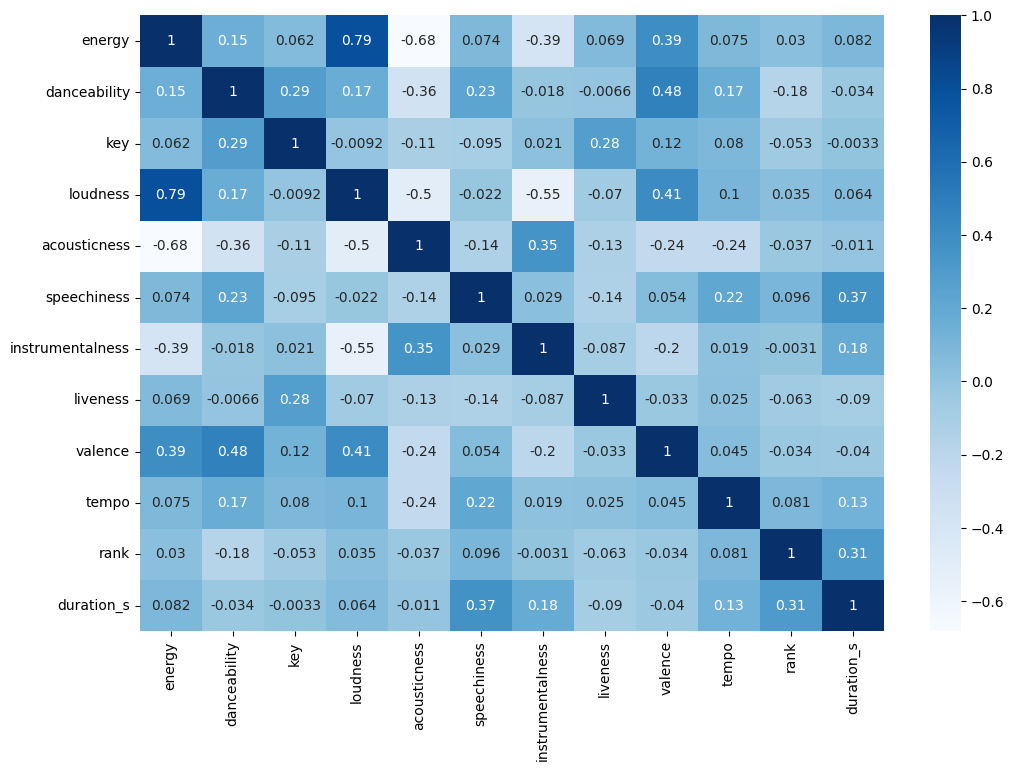

In [833]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(12, 8))
corr = data[features].corr()
sb.heatmap(corr, cmap="Blues", annot=True)

print("There only features that are strongly positively correlated are 'energy' and 'loudness' at 0.79 ")

plt.show()

In [834]:
corr

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,rank,duration_s
energy,1.000000,0.152552,0.062428,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.030381,0.081971
danceability,0.152552,1.000000,0.285036,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.176321,-0.033763
key,0.062428,0.285036,1.000000,-0.009178,-0.113394,-0.094965,0.020802,0.278672,0.120007,0.080475,-0.052844,-0.003345
loudness,0.791640,0.167147,-0.009178,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.034935,0.064130
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.036557,-0.010988
speechiness,0.074267,0.226148,-0.094965,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.095790,0.366976
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,-0.003126,0.184709
liveness,0.069487,-0.006648,0.278672,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.063216,-0.090188
valence,0.393453,0.479953,0.120007,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.034159,-0.039794
tempo,0.075191,0.168956,0.080475,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.081289,0.130328


## Which features are not correlated?

We'll define not correlated features as anything which scores between -0.1 and 0.1


In [835]:
corr_reset = corr.reset_index()
corr_long = corr_reset.melt(id_vars="index", var_name="feature_2", value_name="correlation")
corr_long.rename(columns={"index": "feature_1"}, inplace=True)



In [836]:
corr_long[(corr_long['correlation'] >= -0.1) & (corr_long['correlation'] <= 0.1)].sort_values(by=['feature_1', 'feature_2'], ascending=False)

,feature_1,feature_2,correlation
116,valence,tempo,0.045089
68,valence,speechiness,0.053867
128,valence,rank,-0.034159
92,valence,liveness,-0.033366
140,valence,duration_s,-0.039794
...,...,...,...
85,danceability,liveness,-0.006648
73,danceability,instrumentalness,-0.017706
133,danceability,duration_s,-0.033763
124,acousticness,rank,-0.036557


## How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

On Average Hip/Hop-Rap is typically more danceable

In [837]:
genres = ['Pop','Hip-Hop/Rap','Dance/Electronic','Alternative/Indie']

df_genre_filtered = data[data.apply(lambda row: row['genre'] in genres, axis=1)]

df_genre_filtered[['genre','danceability']].groupby(['genre']).agg(['mean','min','max','std','count']).reset_index()


genre danceability                              
                             mean    min    max       std count
0  Alternative/Indie     0.661750  0.459  0.862  0.211107     4
1   Dance/Electronic     0.755000  0.647  0.880  0.094744     5
2        Hip-Hop/Rap     0.765538  0.598  0.896  0.085470    13
3                Pop     0.677571  0.464  0.806  0.109853    14

## How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


Loudness tends to vary a lot (i.e there a lot of quiete and louder songs)
- On average Dance/Electronic music is the loudest genre. This correlates with those songs being typically more energetic
- Pop music  has the most varied loudness as that genre has the single loudest single track as well as the least loud track. The Std deviation for loudness is twice as big as Hip-Hop/Rap
- Alternative has the most consistent loudness albeit with not much data

In short, Dance/Electronic on average has the loudest music but much louder & queiter music can be found in other categories such as Pop and Hip-Hop/Rap. There is a wide variety of music loudness.

In [838]:
df_genre_filtered[['genre','loudness','energy']].groupby(['genre']).agg(['mean','min','max','std','count']).reset_index()

genre  loudness                                   energy  \
                          mean     min    max       std count      mean   
0  Alternative/Indie -5.421000  -6.401 -4.746  0.774502     4  0.551000   
1   Dance/Electronic -5.338000  -7.567 -3.756  1.479047     5  0.762000   
2        Hip-Hop/Rap -6.917846  -8.820 -3.370  1.891808    13  0.582615   
3                Pop -6.460357 -14.454 -3.280  3.014281    14  0.587286   

                                 
     min    max       std count  
0  0.405  0.631  0.100093     4  
1  0.720  0.844  0.051073     5  
2  0.427  0.745  0.111874    13  
3  0.225  0.855  0.186485    14

## How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


Alternative/Indie music is consistently the genre with the highest acousticness, which could be expected as it's a guitar heavy genre. The least acoustic Alternative/Indie song would have more acoutsiness than the average Dance/Electonic, Hip-Hop/Rap songs

In [839]:
df_genre_filtered[['genre','acousticness']].groupby(['genre']).agg(['mean','min','max','std','count']).reset_index()

genre acousticness                                
                             mean      min    max       std count
0  Alternative/Indie     0.583500  0.29100  0.751  0.204086     4
1   Dance/Electronic     0.099440  0.01370  0.223  0.095828     5
2        Hip-Hop/Rap     0.188741  0.00513  0.731  0.186396    13
3                Pop     0.323843  0.02100  0.902  0.318142    14

# Exploratory Data Analysis

In [840]:
columns = ['energy','danceability','key','loudness','acousticness','speechiness','instrumentalness','liveness','valence','tempo','duration_s']

del_columns = ['Genre_Alternative','Genre_Dance','Genre_Dance-pop','Genre_Disco','Genre_Disco-pop','Genre_Dreampop','Genre_Electro-pop','Genre_Electronic','Genre_Hip-Hop','Genre_Hip-Hop','Genre_Indie','Genre_Nu-disco','Genre_Pop','Genre_Pop','Genre_R&B','Genre_Rap','Genre_Soft Rock','Genre_Soul','Genre_Trap','Genre_experimental','Genre_reggaeton','Genre_Chamber pop','Genre_Hip-Hop alternative','Genre_Pop rap']

data = data.drop(del_columns, axis='columns')


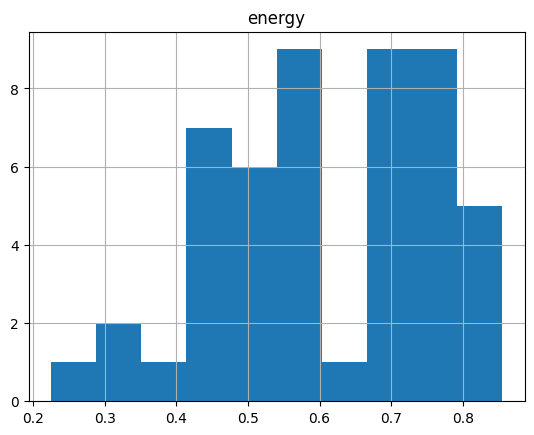

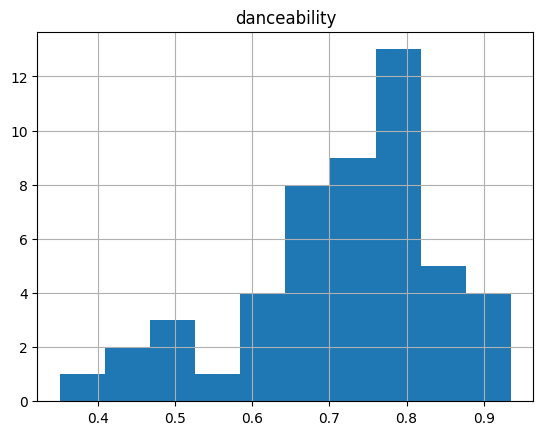

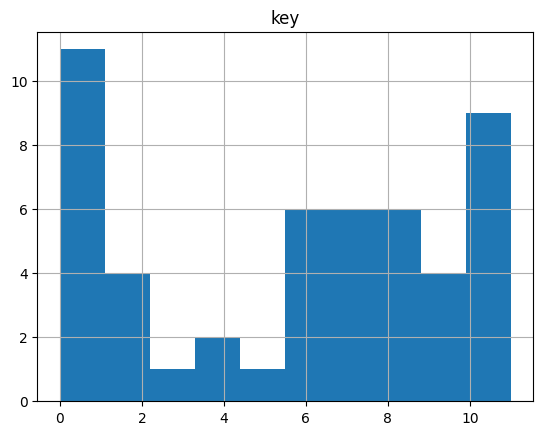

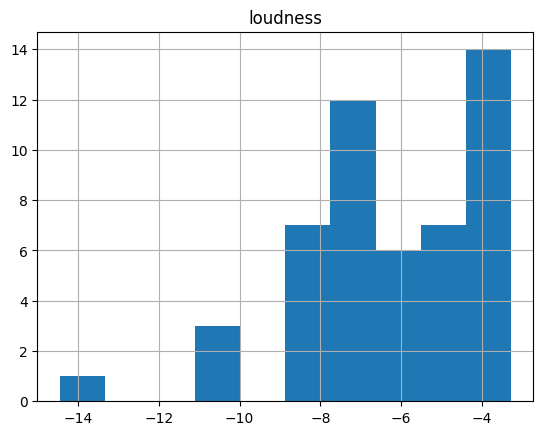

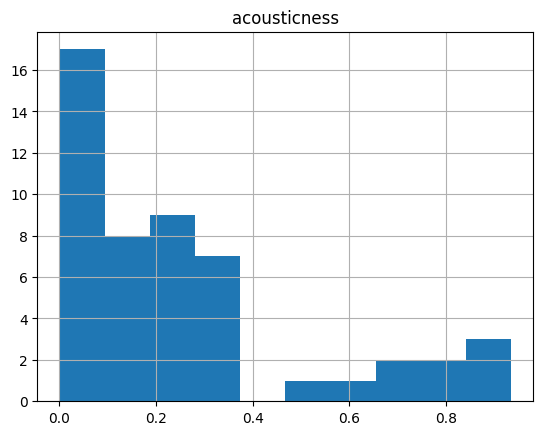

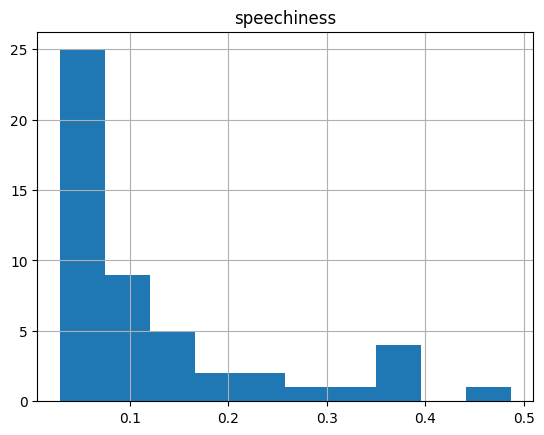

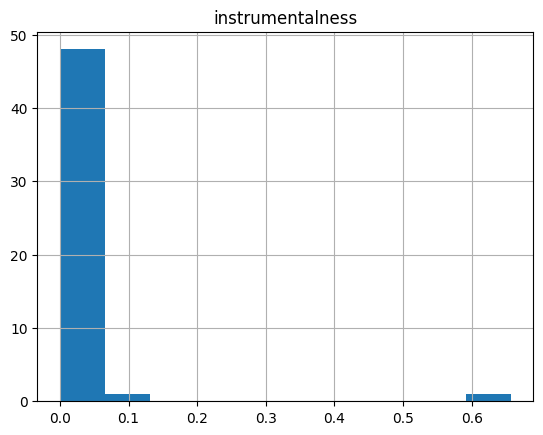

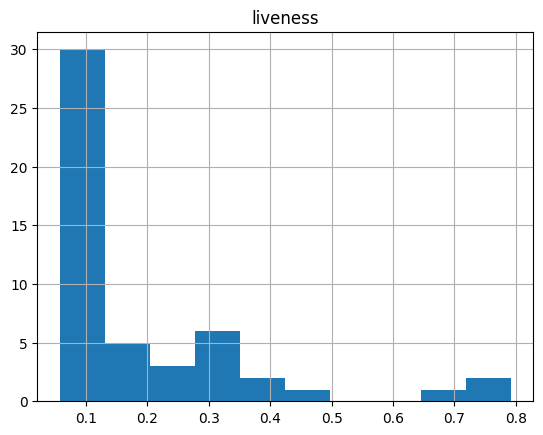

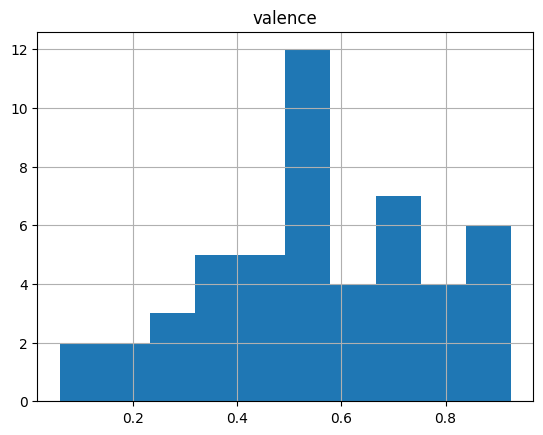

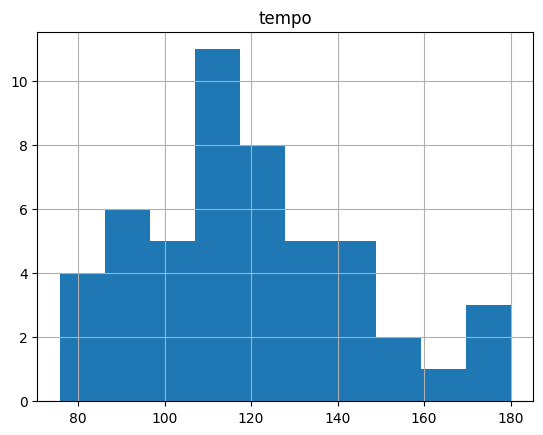

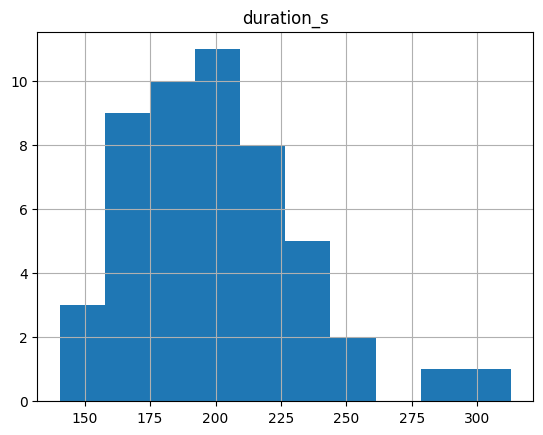

In [841]:
import matplotlib.pyplot as plt

for col in columns:
    data[col].hist()
    plt.title(col)
    plt.show()

In [842]:
data['broad_genre'].value_counts()

broad_genre
Pop                                   20
Hip-Hop/Rap                           15
Dance/Electronic                       7
Alternative/Indie                      4
R&B/Soul                               2
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Name: count, dtype: int64

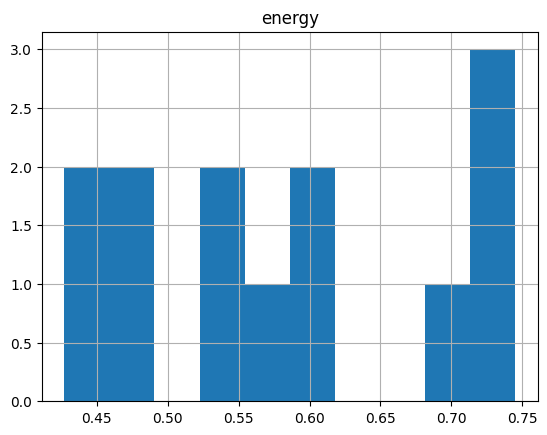

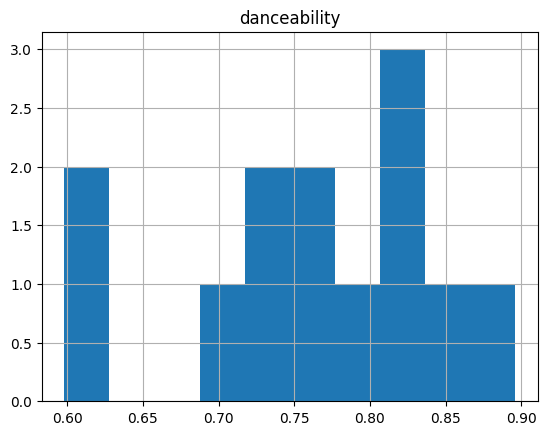

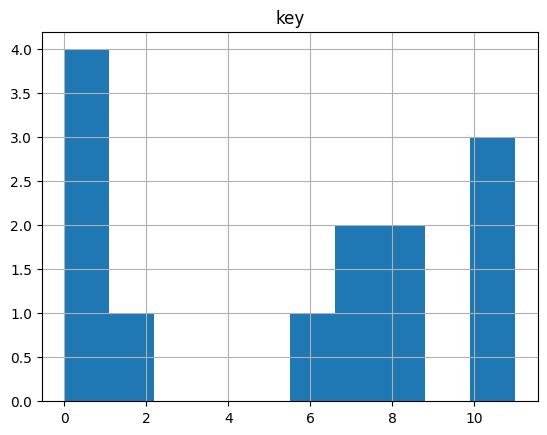

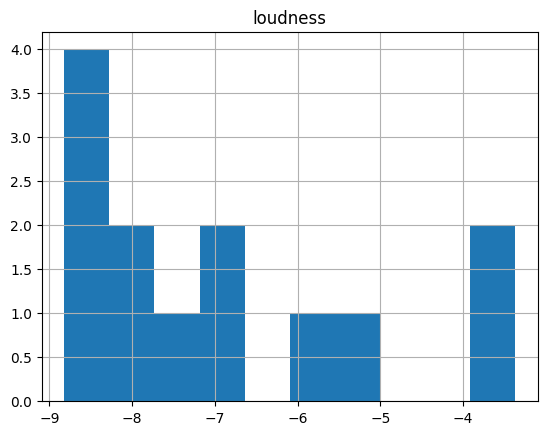

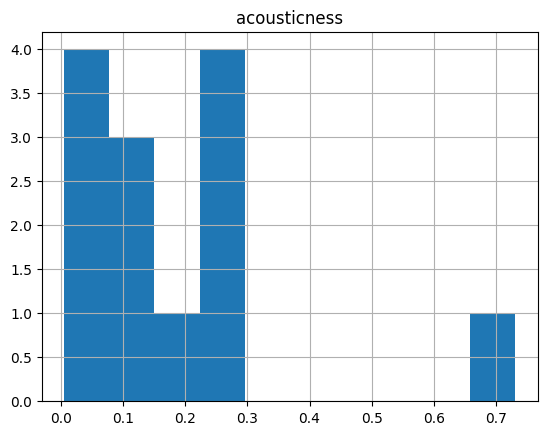

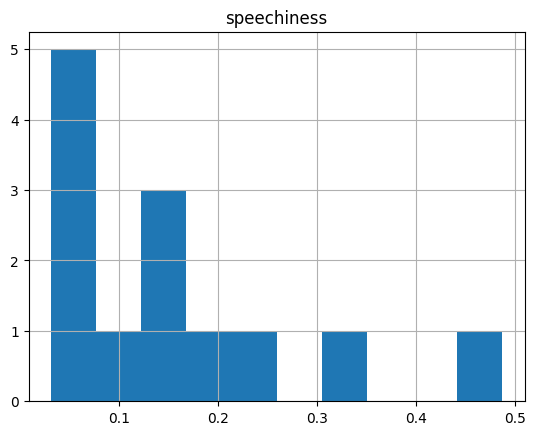

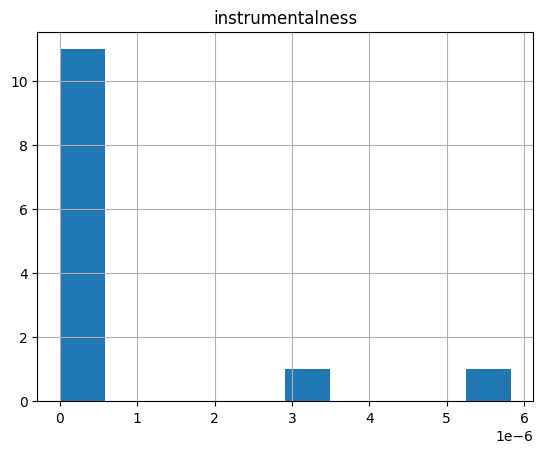

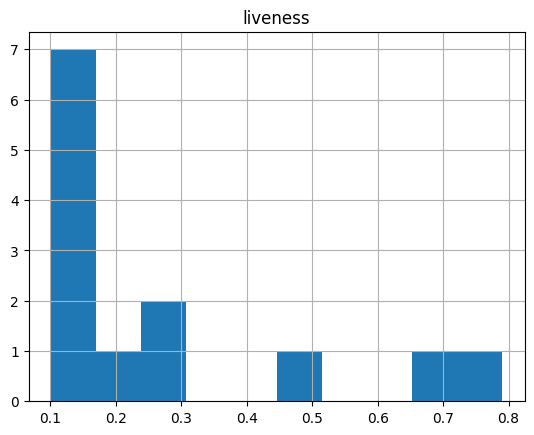

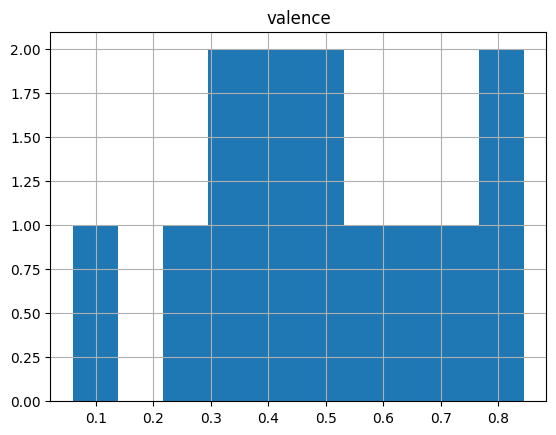

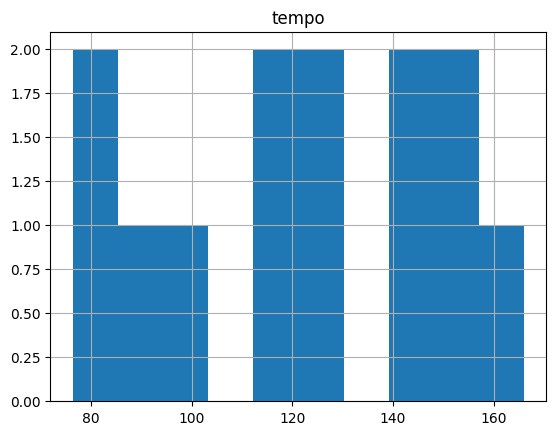

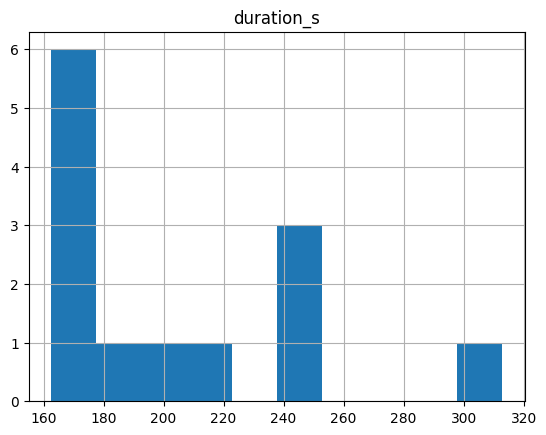

In [843]:
df_genre_filtered = data[data['genre'] == 'Hip-Hop/Rap']

for col in columns:
    df_genre_filtered[col].hist()
    plt.title(col)
    plt.show()

In [844]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,50.0,25.500000,14.577380,1.00000,13.250000,25.50000,37.75000,50.000
energy,50.0,0.609300,0.154348,0.22500,0.494000,0.59700,0.72975,0.855
danceability,50.0,0.716720,0.124975,0.35100,0.672500,0.74600,0.79450,0.935
key,50.0,5.720000,3.709007,0.00000,2.000000,6.50000,8.75000,11.000
loudness,50.0,-6.225900,2.349744,-14.45400,-7.552500,-5.99150,-4.28550,-3.280
acousticness,50.0,0.256206,0.265250,0.00146,0.052800,0.18850,0.29875,0.934
speechiness,50.0,0.124158,0.116836,0.02900,0.048325,0.07005,0.15550,0.487
instrumentalness,50.0,0.015962,0.094312,0.00000,0.000000,0.00000,0.00002,0.657
liveness,50.0,0.196552,0.176610,0.05740,0.093950,0.11100,0.27125,0.792
valence,50.0,0.555710,0.216386,0.06050,0.434000,0.56000,0.72625,0.925


In [845]:
data.groupby('single_release_only')['rank'].describe().T

single_release_only,False,True
count,35.000000,15.000000
mean,25.771429,24.866667
std,15.302990,13.206420
min,1.000000,2.000000
25%,13.500000,15.500000
50%,27.000000,24.000000
75%,38.500000,36.000000
max,50.000000,45.000000


In [846]:
data.groupby('broad_genre')['rank'].describe().reset_index().sort_values(by=['count'], ascending=False)

,broad_genre,count,mean,std,min,25%,50%,75%,max
5,Pop,20.0,29.250000,12.627768,7.0,21.25,28.0,39.75,48.0
4,Hip-Hop/Rap,15.0,22.533333,14.865428,3.0,10.50,20.0,33.50,50.0
2,Dance/Electronic,7.0,26.857143,17.179722,4.0,14.00,32.0,37.50,49.0
0,Alternative/Indie,4.0,15.750000,13.622897,2.0,8.00,13.5,21.25,34.0
6,R&B/Soul,2.0,9.500000,12.020815,1.0,5.25,9.5,13.75,18.0
1,Alternative/reggaeton/experimental,1.0,44.000000,NaN,44.0,44.00,44.0,44.00,44.0
3,Dreampop/Hip-Hop/R&B,1.0,38.000000,NaN,38.0,38.00,38.0,38.00,38.0


In [847]:
data.groupby('broad_genre')['duration_s'].describe().reset_index().sort_values(by=['count'], ascending=False)

,broad_genre,count,mean,std,min,25%,50%,75%,max
5,Pop,20.0,200.507450,24.875123,140.526,190.47150,200.5730,213.38400,245.426
4,Hip-Hop/Rap,15.0,199.355533,43.560514,159.382,168.67650,181.7330,224.35900,312.820
2,Dance/Electronic,7.0,182.300714,20.880747,157.606,171.50650,176.5470,188.55950,221.820
0,Alternative/Indie,4.0,207.627750,17.893828,182.161,202.85650,212.4310,217.20225,223.488
6,R&B/Soul,2.0,218.966500,26.766113,200.040,209.50325,218.9665,228.42975,237.893
1,Alternative/reggaeton/experimental,1.0,295.177000,NaN,295.177,295.17700,295.1770,295.17700,295.177
3,Dreampop/Hip-Hop/R&B,1.0,157.560000,NaN,157.560,157.56000,157.5600,157.56000,157.560


In [848]:
data.dtypes

rank                     int64
artist                  object
album                   object
track_name              object
track_id                object
energy                 float64
danceability           float64
key                      int64
loudness               float64
acousticness           float64
speechiness            float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
genre                   object
single_release_only       bool
duration                object
duration_s             float64
broad_genre             object
dtype: object

In [853]:
data[['danceability','rank']].corr()

,danceability,rank
danceability,1.000000,-0.176321
rank,-0.176321,1.000000
